In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os

In [20]:
df =  pd.read_csv('/home/legend/Desktop/ML/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

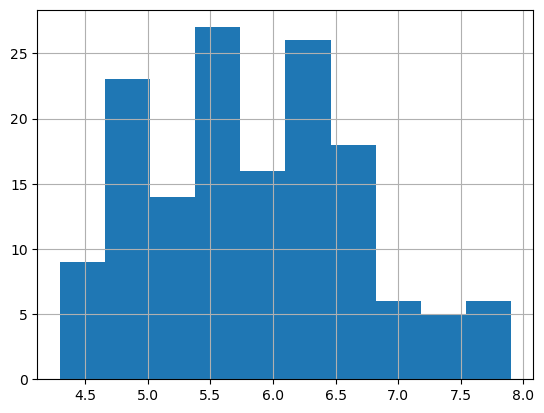

In [25]:
df.SepalLengthCm.hist()

<Axes: >

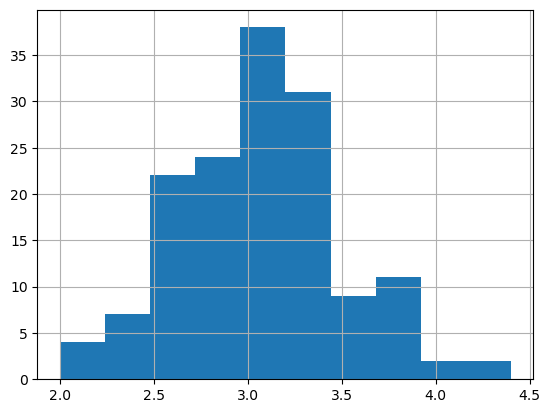

In [26]:
df.SepalWidthCm.hist()

<Axes: >

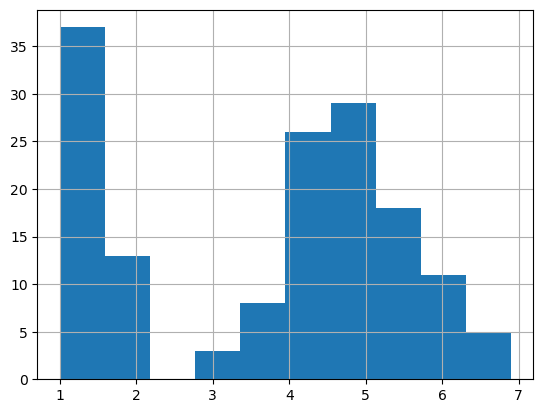

In [27]:
df.PetalLengthCm.hist()

<Axes: >

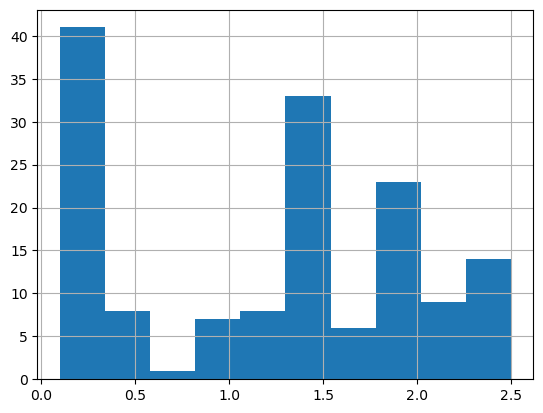

In [28]:
df.PetalWidthCm.hist()

<Axes: >

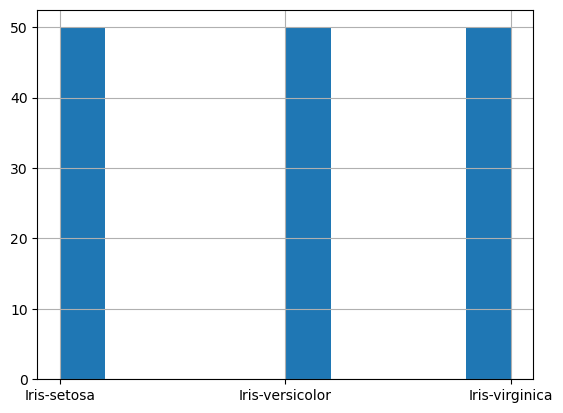

In [29]:
df.Species.hist()

In [33]:
lebel = LabelEncoder()
df.Species = lebel.fit_transform(df['Species'])
df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

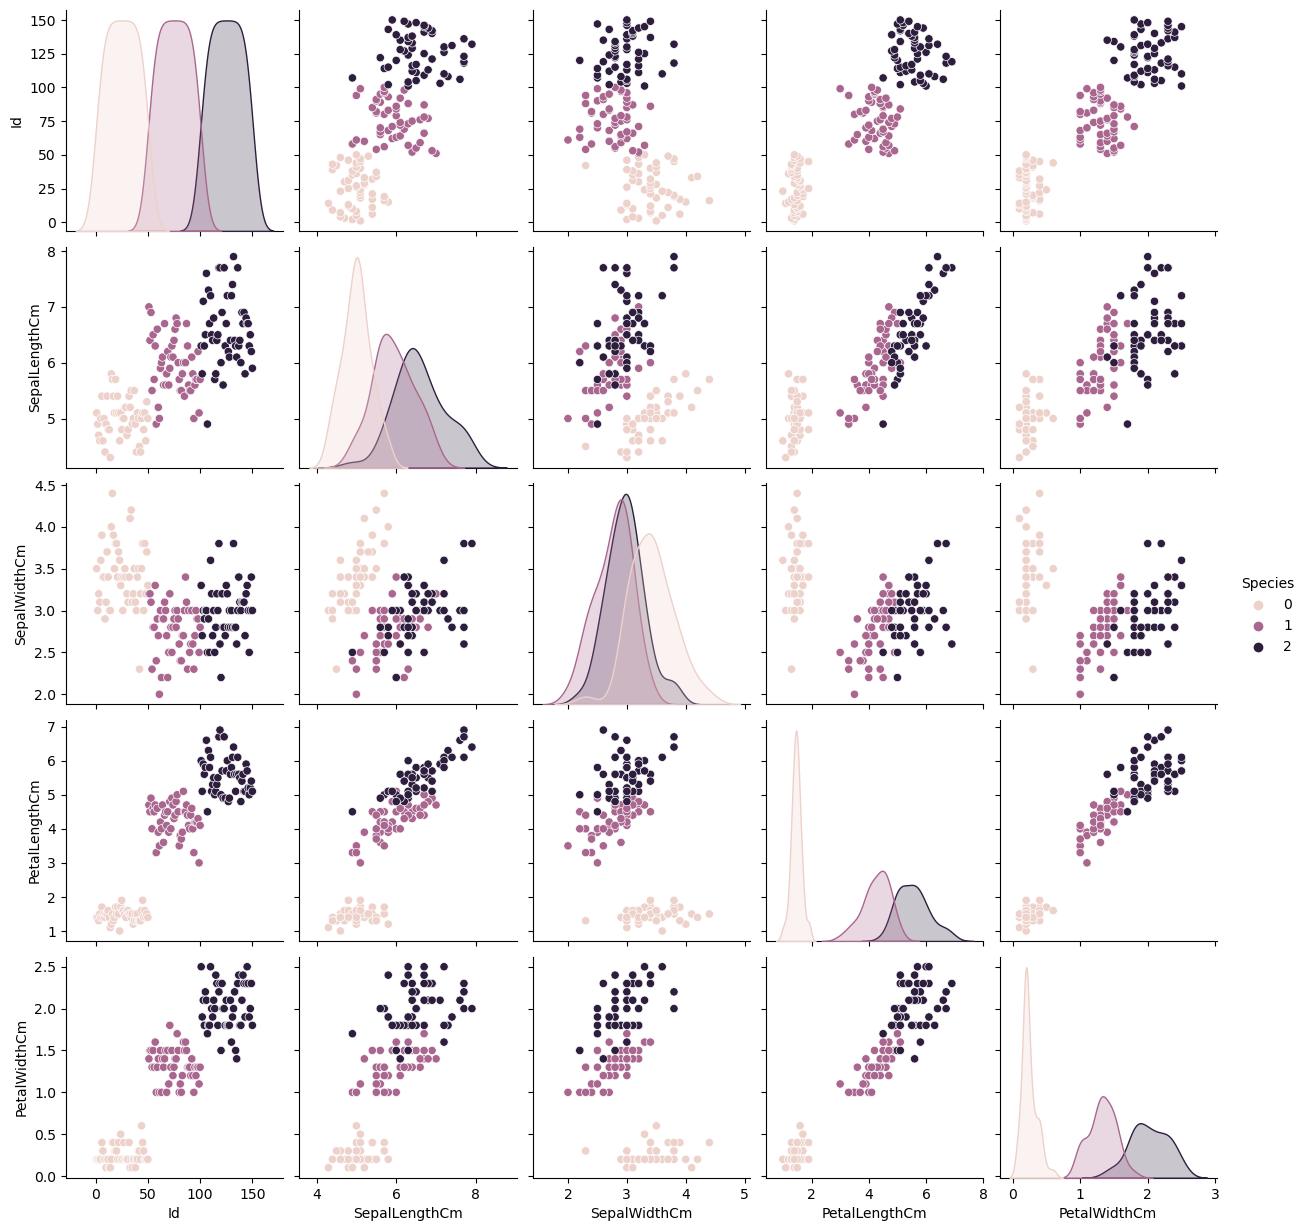

In [35]:
sns.pairplot(df,hue='Species')

In [36]:
correlation = df.corr()
correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [61]:
X = df.drop(['Species','Id'],axis=1)
Y = df.Species
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.45)


In [62]:
modelregration = LogisticRegression()
modelregration.fit(x_train,y_train)
accuracy = modelregration.score(x_test,y_test)*100
accuracy

98.52941176470588

In [63]:
modelknn = KNeighborsClassifier()
modelknn.fit(x_train,y_train)
accuracy_knn = modelknn.score(x_test,y_test)*100
accuracy_knn

95.58823529411765

In [64]:
modeltree = DecisionTreeClassifier()
modeltree.fit(x_train,y_train)
accuracy_tree = modeltree.score(x_test,y_test)*100
accuracy_tree


94.11764705882352

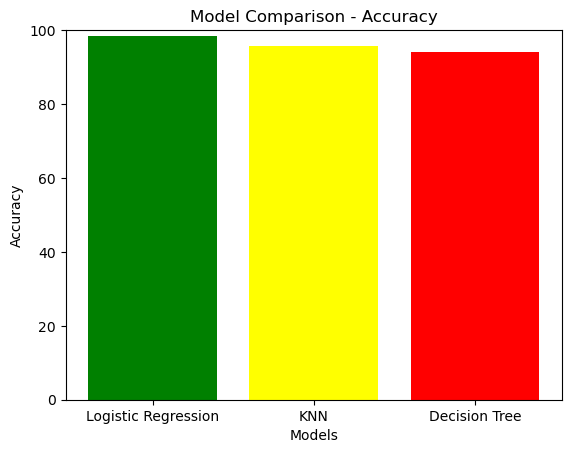

In [65]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy, accuracy_knn, accuracy_tree]

plt.bar(models, accuracies, color=['green', 'yellow', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()